In [12]:
# Import Libraries
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
pd.set_option('display.max_columns', None)

# Section 1: Define Tickers and Time Range

In [3]:
years = 15

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 365 * years)

tickers = ['AMZN', 'VTI', 'VWO', 'VEA', 'BND', 'BJ', 'GS', 'IWM', 'FTNT']

# Section 2: Adjusted Close Prices

In [4]:
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    adj_close_df[ticker] = data['Adj Close']

display(adj_close_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AMZN,VTI,VWO,VEA,BND,BJ,GS,IWM,FTNT
Date,,,,,,,,,
2009-10-05,4.433500,40.072235,25.714266,21.120605,51.922642,NaN,144.024612,47.966614,NaN
2009-10-06,4.545500,40.665775,26.135256,21.467358,51.981441,NaN,144.418472,48.860317,NaN
2009-10-07,4.698500,40.757107,26.075129,21.543016,52.007523,NaN,147.121780,48.876556,NaN
2009-10-08,4.761000,41.114746,26.476078,21.877163,51.987904,NaN,145.337585,49.323410,NaN
2009-10-09,4.785500,41.396294,26.616413,21.788902,51.609070,NaN,146.210403,49.900230,NaN
...,...,...,...,...,...,...,...,...,...
2024-09-24,193.960007,282.000031,47.250000,52.480000,75.339996,82.040001,498.019989,220.378006,77.459999
2024-09-25,192.529999,281.072876,46.770000,52.150002,75.059998,82.139999,491.140015,217.690002,76.610001
2024-09-26,191.160004,282.329010,48.259998,53.310001,75.059998,82.059998,496.920013,218.850006,77.209999


# Section 3: Daily Log Returns and Dropping NAs

In [5]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1)) #  This method of calculating returns is preferred in finance because it allows for easier compounding of returns over time and makes the returns additive.
log_returns = log_returns.dropna() # Drop NAs
print(log_returns)

                AMZN       VTI       VWO       VEA       BND        BJ  \
Date                                                                     
2018-06-29 -0.000970  0.000712  0.016245  0.007487 -0.000252  0.072321   
2018-07-02  0.008191  0.002418 -0.010960 -0.010781 -0.000621 -0.005087   
2018-07-03 -0.011633 -0.002560  0.000958  0.002118  0.002025  0.056993   
2018-07-05  0.003400  0.008439 -0.000958  0.006329  0.001389 -0.047687   
2018-07-06  0.006392  0.008369  0.012145  0.006753  0.001136 -0.004219   
...              ...       ...       ...       ...       ...       ...   
2024-09-24  0.000413  0.002513  0.034230  0.006116  0.001195  0.006849   
2024-09-25 -0.007400 -0.003293 -0.010211 -0.006308 -0.003723  0.001218   
2024-09-26 -0.007141  0.004459  0.031361  0.022000  0.000000 -0.000974   
2024-09-27 -0.016828 -0.000989 -0.000207 -0.006209  0.002927 -0.000488   
2024-09-30 -0.011881 -0.002378 -0.009161 -0.006163 -0.002928  0.005714   

                  GS       IWM      F

# Section 4: Create Equally Weighted Portfolio

In [6]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]


# Section 5: Calculating Historical Portfolio Returns

In [7]:
historical_returns = (log_returns * weights) # The contribution of each asset's return to the overall portfolio return for that time period
historical_returns = historical_returns.sum(axis=1)
print(historical_returns)

Date
2018-06-29    0.009079
2018-07-02    0.002878
2018-07-03    0.003729
2018-07-05   -0.000506
2018-07-06    0.005960
                ...   
2024-09-24    0.006053
2024-09-25   -0.007437
2024-09-26    0.008280
2024-09-27   -0.000973
2024-09-30   -0.005198
Length: 1573, dtype: float64


# Section 6: Finding X-Day Historical Return

In [8]:
days = 50

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
display(range_returns)

Date
2018-09-10    0.102163
2018-09-11    0.092109
2018-09-12    0.090764
2018-09-13    0.086640
2018-09-14    0.085658
                ...   
2024-09-24    0.038444
2024-09-25    0.021248
2024-09-26    0.038773
2024-09-27    0.052326
2024-09-30    0.051453
Length: 1524, dtype: float64

# Section 7: VaR Using the Parametric Method

In [9]:
cov_matrix = log_returns.cov() * 252
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

In [13]:
confidence_levels = [0.90, 0.95, 0.99]

VaRs = []
for cl in confidence_levels:
    VaR = portfolio_value * (norm.ppf(1 - cl) * portfolio_std_dev * np.sqrt(days / 252) - historical_returns.mean() * days)
    VaRs.append(VaR)

In [15]:
# Output Display
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)

for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $-132,969.00
    95%:          $-163,787.88
    99%:          $-221,598.97


# Section 8: Visualization

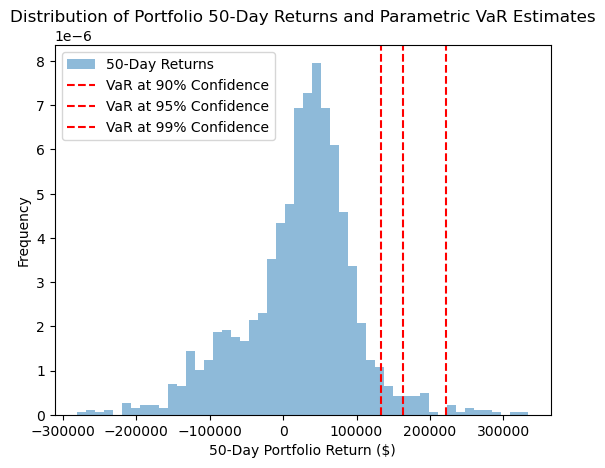

In [17]:
# Convert returns to dollar values for the histogram
historical_x_day_returns_dollar = range_returns * portfolio_value

# Plot the histogram
plt.hist(historical_x_day_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for cl, VaR in zip(confidence_levels, VaRs):
    plt.axvline(x=-VaR, linestyle='--', color='r', label='VaR at {}% Confidence'.format(int(cl * 100)))

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()